In [3]:
import sklearn
import pandas as pd
import numpy as np
from sklearn import neighbors, linear_model
from matplotlib.colors import ListedColormap
import scipy
%matplotlib inline
import matplotlib.pyplot as plt

Creating list of independent variables

In [4]:
data = pd.read_csv("wdbc.csv.bz2")
data.head()
feature_list = list(data)
feature_list.remove('id')
feature_list.remove('diagnosis')
feature_list

['radius.mean',
 'texture.mean',
 'perimeter.mean',
 'area.mean',
 'smoothness.mean',
 'compactness.mean',
 'concavity.mean',
 'concpoints.mean',
 'symmetry.mean',
 'fracdim.mean',
 'radius.se',
 'texture.se',
 'perimeter.se',
 'area.se',
 'smoothness.se',
 'compactness.se',
 'concavity.se',
 'concpoints.se',
 'symmetry.se',
 'fracdim.se',
 'radius.worst',
 'texture.worst',
 'perimeter.worst',
 'area.worst',
 'smoothness.worst',
 'compactness.worst',
 'concavity.worst',
 'concpoints.worst',
 'symmetry.worst',
 'fracdim.worst']

Describing variables

In [5]:
data.describe()

,id,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Converting diagnosis to 0/1 binary variable, dropping id and original diagnosis to aid model-building.

In [6]:
data['diagnosis_bin'] = np.where(data['diagnosis']=='M', 1, 0)
data = data.drop(columns=['id','diagnosis'])
data.head()

,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,fracdim.mean,...,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst,diagnosis_bin
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Finding correlation between each independent variable and the binary classification (malignant/benign)

In [7]:
for feature in feature_list:
    print([feature, data['diagnosis_bin'].corr(data[feature])])

['radius.mean', 0.7300285113754558]
['texture.mean', 0.41518529984520364]
['perimeter.mean', 0.742635529725832]
['area.mean', 0.7089838365853891]
['smoothness.mean', 0.3585599650859317]
['compactness.mean', 0.5965336775082525]
['concavity.mean', 0.6963597071719048]
['concpoints.mean', 0.7766138400204347]
['symmetry.mean', 0.33049855426254654]
['fracdim.mean', -0.012837602698432347]
['radius.se', 0.5671338208247166]
['texture.se', -0.008303332973877411]
['perimeter.se', 0.5561407034314825]
['area.se', 0.5482359402780237]
['smoothness.se', -0.06701601057948724]
['compactness.se', 0.29299924424885815]
['concavity.se', 0.25372976598083014]
['concpoints.se', 0.40804233271650414]
['symmetry.se', -0.006521755870647973]
['fracdim.se', 0.07797241739025601]
['radius.worst', 0.7764537785950386]
['texture.worst', 0.45690282139679755]
['perimeter.worst', 0.7829141371737584]
['area.worst', 0.7338250349210504]
['smoothness.worst', 0.421464861066402]
['compactness.worst', 0.5909982378417913]
['concavi

Plotting relationship between variable and outcome for two strongly correlated features (radius.mean, perimeter.worst) and one weak-negatively corrlelated feature (fracdim.mean)

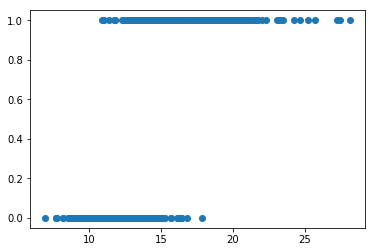

In [8]:
plt.plot(data['radius.mean'], data['diagnosis_bin'], 'o')

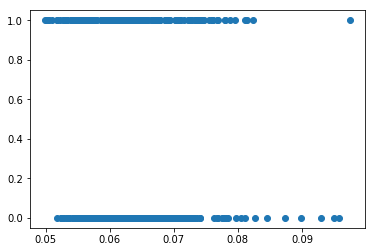

In [9]:
plt.plot(data['fracdim.mean'], data['diagnosis_bin'], 'o')

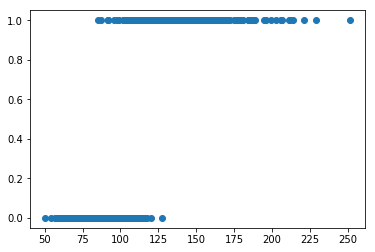

In [10]:
plt.plot(data['perimeter.worst'], data['diagnosis_bin'], 'o')

Building and plotting KNN and Logistic Regression models using the radius.mean and perimeter.worst features, which were previously found to be strongly, positively correlated with malignant outcome.

It can be seen that KNN does a better job than the logistic regression in picking up the actual shape... that being said, we're using a simple linear model for our logistic regression, so our baseline model is not great. 

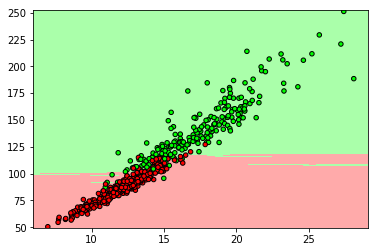

In [11]:
n_neighbors = 5
X = data[['radius.mean', 'perimeter.worst']].as_matrix()
y = data['diagnosis_bin']

h = .02 

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


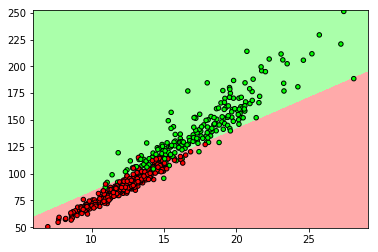

In [12]:
clf = linear_model.LogisticRegression()
clf.fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


In [13]:
X.shape

(569, 2)

In [14]:
X = data[['radius.mean', 'perimeter.worst']]
X['x*y'] = X['radius.mean']*X['perimeter.worst']
X['x**2'] = X['radius.mean'] * X['radius.mean']
X['y**2'] = X['perimeter.worst'] * X['perimeter.worst']

/home/aditya/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/aditya/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aditya/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [15]:
X1=X[['x*y','x**2']].as_matrix()
X1.shape

(569, 2)

In [16]:
clf = linear_model.LogisticRegression()
clf.fit(X1, y)
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = clf.predict(X1)

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X1[:, 0], X1[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


MemoryError: 

Implemented a custom cross-validation function called crossValidation - it takes the a 2d numpy array and a K value (number of partitions) as input and executes the operation specified in the performOperation function. Separation of concerns increases reusability. 

In [17]:
import math 
from sklearn import metrics as mt
#cross-validation


def performOperation(iteration, data_test, data_train):
    clf = linear_model.LogisticRegression()
    clf.fit(data_train[:,:-1], data_train[:,-1])
    predictions = clf.predict(data_test[:,:-1])
    score = clf.score(data_test[:,:-1], data_test[:,-1])
    print "Iteration: ", iteration
    print "Accuracy: ", score
    print "Precision: ", mt.precision_score(data_test[:,-1],predictions)
    print "Recall: ", mt.recall_score(data_test[:,-1],predictions)
    return (score, mt.precision_score(data_test[:,-1],predictions), mt.recall_score(data_test[:,-1],predictions))
    
def crossValidation(data, k):
    rows = data.shape[0]
    size = int(math.floor(rows/k))
    indexes = np.array(list(range(data.shape[0])))
    np.random.shuffle(indexes)
    tot_acc = 0
    tot_pre = 0
    tot_rec = 0
    for i in range(k):
        test_start = i*size
        test_end = test_start+size
        test_indexes = indexes[test_start:test_end]
        data_test = data[test_indexes,:]
        data_train = data[~test_indexes,:]
        tup = performOperation(i, data_test, data_train)
        tot_acc = tot_acc + tup[0]
        tot_pre = tot_pre + tup[1]
        tot_rec = tot_rec + tup[2]
    avg_acc = tot_acc/k
    avg_pre = tot_pre/k
    avg_rec = tot_rec/k
    print "Average Accuracy: ", avg_acc
    print "Average Precision: ", avg_pre
    print "Average Recall: ", avg_rec

crossValidation(data.as_matrix(),10)
        

Iteration:  0
Accuracy:  0.8214285714285714
Precision:  1.0
Recall:  0.5652173913043478
Iteration:  1
Accuracy:  0.8928571428571429
Precision:  0.8095238095238095
Recall:  0.8947368421052632
Iteration:  2
Accuracy:  0.8571428571428571
Precision:  0.9285714285714286
Recall:  0.65
Iteration:  3
Accuracy:  0.9285714285714286
Precision:  0.9583333333333334
Recall:  0.8846153846153846
Iteration:  4
Accuracy:  0.9464285714285714
Precision:  0.8636363636363636
Recall:  1.0
Iteration:  5
Accuracy:  0.9642857142857143
Precision:  0.9545454545454546
Recall:  0.9545454545454546
Iteration:  6
Accuracy:  0.9642857142857143
Precision:  0.9473684210526315
Recall:  0.9473684210526315
Iteration:  7
Accuracy:  0.9464285714285714
Precision:  0.9473684210526315
Recall:  0.9
Iteration:  8
Accuracy:  0.8392857142857143
Precision:  0.7916666666666666
Recall:  0.8260869565217391
Iteration:  9
Accuracy:  0.875
Precision:  0.7391304347826086
Recall:  0.9444444444444444
Average Accuracy:  0.9035714285714285
Aver

Repeating for a regularized model using the Lasso method.

In [18]:
def performOperation(iteration, data_test, data_train):
    clf = linear_model.Lasso()
    clf.fit(data_train[:,:-1], data_train[:,-1])
    predictions = clf.predict(data_test[:,:-1])
    score = clf.score(data_test[:,:-1], data_test[:,-1])
    print "Iteration: ", iteration
    print "Accuracy: ", score
    #print "Precision: ", mt.precision_score(data_test[:,-1],predictions)
    #print "Recall: ", mt.recall_score(data_test[:,-1],predictions)
    #return (score, mt.precision_score(data_test[:,-1],predictions), mt.recall_score(data_test[:,-1],predictions))
    
def crossValidation(data, k):
    rows = data.shape[0]
    size = int(math.floor(rows/k))
    indexes = np.array(list(range(data.shape[0])))
    np.random.shuffle(indexes)
    tot_acc = 0
    tot_pre = 0
    tot_rec = 0
    for i in range(k):
        test_start = i*size
        test_end = test_start+size
        test_indexes = indexes[test_start:test_end]
        data_test = data[test_indexes,:]
        data_train = data[~test_indexes,:]
        tup = performOperation(i, data_test, data_train)
        #tot_acc = tot_acc + tup[0]
        #tot_pre = tot_pre + tup[1]
        #tot_rec = tot_rec + tup[2]
    avg_acc = tot_acc/k
    avg_pre = tot_pre/k
    avg_rec = tot_rec/k
    print "Average Accuracy: ", avg_acc
    print "Average Precision: ", avg_pre
    print "Average Recall: ", avg_rec

crossValidation(data.as_matrix(),10)

Iteration:  0
Accuracy:  0.6076825068827427
Iteration:  1
Accuracy:  0.5633235617913002
Iteration:  2
Accuracy:  0.5356749088292501
Iteration:  3
Accuracy:  0.6782803638747208
Iteration:  4
Accuracy:  0.5304439431708139
Iteration:  5
Accuracy:  0.19555126539821677
Iteration:  6
Accuracy:  0.35344858597497575
Iteration:  7
Accuracy:  0.5375359417891334
Iteration:  8
Accuracy:  0.5929199838303155
Iteration:  9
Accuracy:  0.4538694017193555
Average Accuracy:  0
Average Precision:  0
Average Recall:  0


Plotting ROC curve and precision vs recall for several classification models, using all features in the dataset.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.as_matrix()[:,:-1], data.as_matrix()[:,-1], test_size=0.33, random_state=42)



[0.30842087 1.         1.         0.         0.         1.
 1.         0.81730177 0.         0.         0.         1.
 0.14508286 0.38657458 0.         1.         0.37156815 0.
 0.         1.         0.40739654 0.         1.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.49224925 0.         0.
 1.         0.         1.         0.20456907 0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         1.         0.         0.
 0.         0.         0.         1.         0.49850033 0.
 0.         1.         1.         0.38115036 0.         0.
 1.         1.         0.         0.         0.43982312 1.
 0.         0.35708211 0.         0.         0.         0.37779257
 0.         0.         1.         0.         0.64819735 1.
 1.         0.81463772 0.81258893 1.         0.         0.
 0.         0.         0.16957958 0.         0.         0.
 1.         1.         0.         1.         1. 

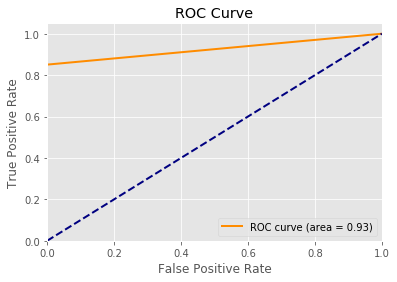

In [22]:
KNNmod5 = KNeighborsClassifier(5, weights='distance')
KNNmod5.fit(X_train, y_train)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = KNNmod5.predict_proba(X_test)[:,1]

print(y_predict_probabilities)

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities>0.8)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

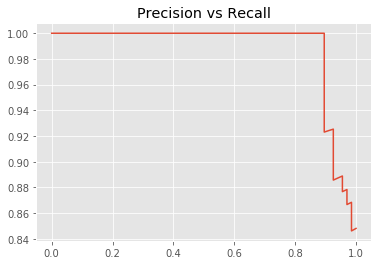

In [23]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_predict_probabilities)
plt.plot(recall, precision)
plt.title('Precision vs Recall')
plt.show()

[0.30842087 1.         1.         0.         0.         1.
 1.         0.81730177 0.         0.         0.         1.
 0.14508286 0.38657458 0.         1.         0.37156815 0.
 0.         1.         0.40739654 0.         1.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.49224925 0.         0.
 1.         0.         1.         0.20456907 0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         1.         0.         0.
 0.         0.         0.         1.         0.49850033 0.
 0.         1.         1.         0.38115036 0.         0.
 1.         1.         0.         0.         0.43982312 1.
 0.         0.35708211 0.         0.         0.         0.37779257
 0.         0.         1.         0.         0.64819735 1.
 1.         0.81463772 0.81258893 1.         0.         0.
 0.         0.         0.16957958 0.         0.         0.
 1.         1.         0.         1.         1. 

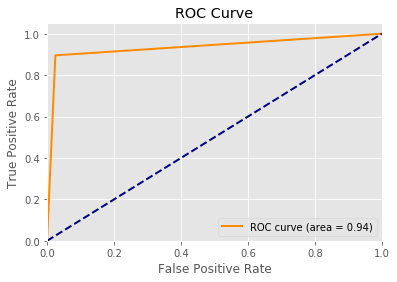

In [27]:
KNNmod5 = KNeighborsClassifier(5, weights='distance')
KNNmod5.fit(X_train, y_train)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = KNNmod5.predict_proba(X_test)[:,1]

print(y_predict_probabilities)

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities>0.6)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

[0.30842087 1.         1.         0.         0.         1.
 1.         0.81730177 0.         0.         0.         1.
 0.14508286 0.38657458 0.         1.         0.37156815 0.
 0.         1.         0.40739654 0.         1.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.49224925 0.         0.
 1.         0.         1.         0.20456907 0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         1.         0.         0.
 0.         0.         0.         1.         0.49850033 0.
 0.         1.         1.         0.38115036 0.         0.
 1.         1.         0.         0.         0.43982312 1.
 0.         0.35708211 0.         0.         0.         0.37779257
 0.         0.         1.         0.         0.64819735 1.
 1.         0.81463772 0.81258893 1.         0.         0.
 0.         0.         0.16957958 0.         0.         0.
 1.         1.         0.         1.         1. 

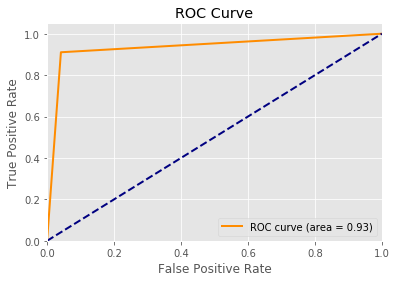

In [29]:
KNNmod5 = KNeighborsClassifier(5, weights='distance')
KNNmod5.fit(X_train, y_train)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = KNNmod5.predict_proba(X_test)[:,1]

print(y_predict_probabilities)

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities>0.5)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

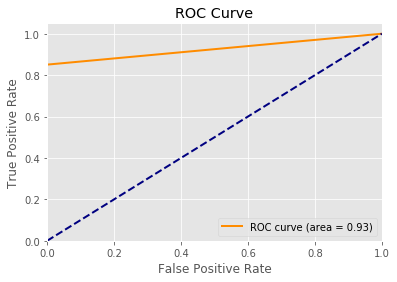

In [33]:
KNNmod7 = KNeighborsClassifier(7, weights='distance')
KNNmod7.fit(X_train, y_train)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = KNNmod7.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities>0.7)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

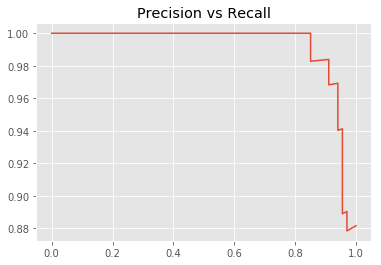

In [31]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_predict_probabilities)
plt.plot(recall, precision)
plt.title('Precision vs Recall')
plt.show()

[0.30842087 1.         1.         0.         0.         1.
 1.         0.81730177 0.         0.         0.         1.
 0.14508286 0.38657458 0.         1.         0.37156815 0.
 0.         1.         0.40739654 0.         1.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.49224925 0.         0.
 1.         0.         1.         0.20456907 0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         1.         0.         0.
 0.         0.         0.         1.         0.49850033 0.
 0.         1.         1.         0.38115036 0.         0.
 1.         1.         0.         0.         0.43982312 1.
 0.         0.35708211 0.         0.         0.         0.37779257
 0.         0.         1.         0.         0.64819735 1.
 1.         0.81463772 0.81258893 1.         0.         0.
 0.         0.         0.16957958 0.         0.         0.
 1.         1.         0.         1.         1. 

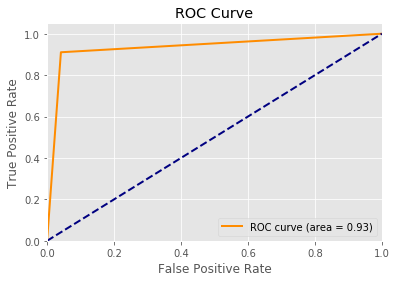

In [32]:
KNNmod5 = KNeighborsClassifier(5, weights='distance')
KNNmod5.fit(X_train, y_train)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = KNNmod5.predict_proba(X_test)[:,1]

print(y_predict_probabilities)

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities>0.5)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
GNBmod = GaussianNB()
GNBmod.fit(X_train, y_train)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = GNBmod.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

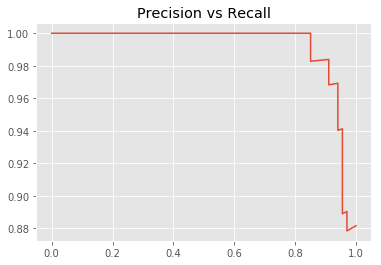

In [34]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_predict_probabilities)
plt.plot(recall, precision)
plt.title('Precision vs Recall')
plt.show()

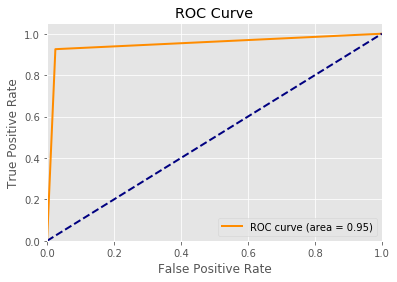

In [35]:
LRmod = LogisticRegression()
LRmod.fit(X_train, y_train)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = LRmod.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities>0.7)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

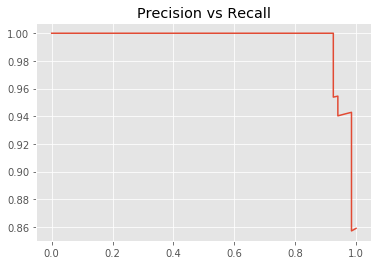

In [36]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_predict_probabilities)
plt.plot(recall, precision)
plt.title('Precision vs Recall')
plt.show()

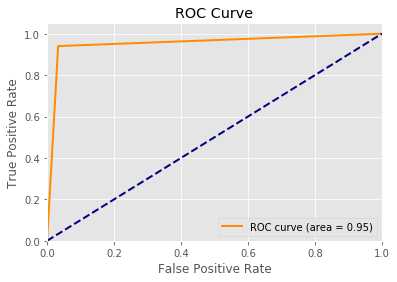

In [37]:
LRmod = LogisticRegression()
LRmod.fit(X_train, y_train)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = LRmod.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities>0.5)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()